In [1]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

import pandas as pd
import time
import numpy as np
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [2]:
house_df = pd.read_csv('data/house_mean_imputation.csv')
#house_df = pd.read_csv('data/ready_to_use_dataset.csv')
house_df = house_df.drop_duplicates(['year', 'state', 'district', 'name'])

display(house_df.shape)

(9974, 20)

In [3]:
house_df['last_house_majority'].unique() 

array(['R', 'D'], dtype=object)

In [4]:
#house_df2=house_df.set_index(['year', 'state', 'district', 'name']).dropna().copy()
house_df2=house_df.dropna().copy()
house_df2_districts=house_df2[['state','district']]
house_df2=house_df2.drop('state', axis=1).drop('district', axis=1).drop('name', axis=1)
house_df2['party']=house_df2['party'].replace(['D', 'R'], [0, 1])
house_df2['president_party']=house_df2['president_party'].replace(['D', 'R'], [0, 1])
house_df2['last_house_majority']=house_df2['last_house_majority'].replace(['D', 'R'], [0, 1])
data_train, data_test=house_df2[house_df2['year']!=2018], house_df2[house_df2['year']==2018]

x_train, y_train=data_train.drop('won', axis=1), data_train['won']

x_test, y_test=data_test.drop('won', axis=1), data_test['won']
baselineLogRegr=LogisticRegressionCV(cv=5, penalty='l2').fit(x_train, y_train)

In [5]:
display(house_df[(house_df['year']!=2018)&(house_df['state']=='Alabama')&(house_df['district']=='District 1')])

,district,is_incumbent,name,party,percent,state,votes,won,year,first_time_elected,count_victories,unemployement_rate,is_presidential_year,president_can_be_re_elected,president_party,president_overall_avg_job_approval,last_D_house_seats,last_R_house_seats,last_house_majority,fundraising
4254,District 1,0.0,Judy Belk,D,38.0,Alabama,67507,0,2002,0.0,0,5.7,0.0,1.0,R,0.494,212.0,221.0,R,7.465678e+05
4255,District 1,0.0,Jo Bonner,R,61.0,Alabama,108102,1,2002,2002.0,0,5.7,0.0,1.0,R,0.494,212.0,221.0,R,7.465678e+05
5021,District 1,0.0,Judy Belk,D,37.0,Alabama,93938,0,2004,0.0,0,5.5,1.0,0.0,R,0.494,205.0,229.0,R,7.465678e+05
5022,District 1,1.0,Jo Bonner,R,63.0,Alabama,161067,1,2004,2002.0,1,5.5,1.0,0.0,R,0.494,205.0,229.0,R,7.465678e+05
5556,District 1,1.0,Jo Bonner,R,68.0,Alabama,112944,1,2006,2002.0,2,4.4,0.0,0.0,R,0.494,202.0,232.0,R,7.465678e+05
5576,District 1,0.0,Vivian Beckerle,D,32.0,Alabama,52770,0,2006,0.0,0,4.4,0.0,0.0,R,0.494,202.0,232.0,R,7.465678e+05
5742,District 1,1.0,Jo Bonner,R,98.0,Alabama,210660,1,2008,2002.0,3,6.5,1.0,1.0,D,0.480,233.0,202.0,D,7.465678e+05
6316,District 1,1.0,Jo Bonner,R,83.0,Alabama,129063,1,2010,2002.0,4,9.4,0.0,1.0,D,0.480,257.0,178.0,D,9.001988e+05
7326,District 1,1.0,Jo Bonner,R,97.9,Alabama,196374,1,2012,2002.0,5,10.9,1.0,0.0,D,0.480,193.0,242.0,R,1.177293e+06
8227,District 1,0.0,Burton LeFlore,D,31.7,Alabama,48278,0,2014,0.0,0,8.3,0.0,0.0,D,0.480,201.0,234.0,R,4.001050e+03


In [6]:
#Accuracy is defined as (TP+TN)/n
def printAccuracy(y_train, y_pred_train, y_test, y_pred_test):
    print('Training Set Accuracy: \t{:.2%}'.format(np.sum(y_train == y_pred_train) / len(y_train)))
    print('Test Set Accuracy: \t{:.2%}'.format(np.sum(y_test == y_pred_test) / len(y_test)))

#y_pred_train=baselineLogRegr.predict_proba(x_train)[:,1]
y_pred_train=baselineLogRegr.predict(x_train)
#y_pred_test=baselineLogRegr.predict_proba(x_test)[:,1]
y_pred_test=baselineLogRegr.predict(x_test)
printAccuracy(y_train, y_pred_train, y_test, y_pred_test)

Training Set Accuracy: 	97.38%
Test Set Accuracy: 	97.02%


In [25]:
#Add index to predictions from X set
y_pred_train=pd.DataFrame(y_pred_train, index=x_train.index, columns=['y_pred'])
y_pred_test=pd.DataFrame(y_pred_test, index=x_test.index, columns=['y_pred'])
#display(y_pred_test.head())
districts_pred_test=house_df2_districts.join(x_test[['party']]).join(y_pred_test).dropna()

display(districts_pred_test.head())
print('Amount of districts in the predictions: {:.1%} of the total'.format(len(districts_pred_test.groupby(['state', 'district']).count())/435))

,state,district,party,y_pred
9130,California,District 28,0.0,1.0
9131,Utah,District 2,0.0,0.0
9132,California,District 31,0.0,1.0
9133,Texas,District 35,0.0,1.0
9134,Texas,District 36,1.0,1.0


Amount of districts in the predictions: 100.0% of the total


In [33]:
#districts with more than one winner or no winners 
house_df_grouped=districts_pred_test.groupby(['state', 'district'])['y_pred'].sum().reset_index(drop=False)
display(len(house_df_grouped[house_df_grouped['y_pred']!=1]))
(house_df_grouped[house_df_grouped['y_pred']!=1])
#districts_pred_test[(districts_pred_test['state']=='California')&(districts_pred_test['district']=='District 25')]

25

,state,district,y_pred
38,California,District 25,2.0
63,California,District 48,2.0
79,Colorado,District 6,2.0
105,Florida,District 26,2.0
124,Georgia,District 6,2.0
137,Illinois,District 14,2.0
159,Iowa,District 1,2.0
161,Iowa,District 3,2.0
165,Kansas,District 3,2.0
210,Michigan,District 8,2.0


In [120]:
#predict probaiblities
y_pred_train=baselineLogRegr.predict_proba(x_train)[:,1]
y_pred_test=baselineLogRegr.predict_proba(x_test)[:,1]

#Add index to predictions from X set
y_pred_train_df=pd.DataFrame(y_pred_train, index=x_train.index, columns=['y_pred'])
y_pred_test_df=pd.DataFrame(y_pred_test, index=x_test.index, columns=['y_pred'])

#Join candidates data by index
districts_pred_train=house_df2_districts.join(x_train[['party']]).join(y_pred_train_df).dropna()
districts_pred_test=house_df2_districts.join(x_test[['party']]).join(y_pred_test_df).dropna()
#districts_pred_test=districts_pred_test.reset_index(drop=False)

#Group by district and take max probability
#districts_pred_test_grouped=districts_pred_test.groupby(['state', 'district']).agg({'y_pred':('max', 'sum'), 'party':'first', 'index':'first'})
districts_pred_test_grouped=districts_pred_test.groupby(['state', 'district']).agg({'y_pred':('max', 'sum')})
districts_pred_test_grouped.columns = ['max_won_proba', 'sum_won_proba']
districts_pred_test_grouped['relative_won_proba']=districts_pred_test_grouped['max_won_proba']/districts_pred_test_grouped['sum_won_proba']
districts_pred_test_grouped = districts_pred_test_grouped.reset_index(drop=False)

#districts_pred_test_grouped.columns = ['max_won_proba', 'sum_won_proba', 'party', 'index']
districts_pred_test_grouped['won_pred']=1
districts_pred_test_grouped.head()

,state,district,max_won_proba,sum_won_proba,relative_won_proba,won_pred
0,Alabama,District 1,0.984198,0.984229,0.999968,1
1,Alabama,District 2,0.975889,0.975920,0.999968,1
2,Alabama,District 3,0.983245,0.983272,0.999973,1
3,Alabama,District 4,0.992210,0.992223,0.999987,1
4,Alabama,District 5,0.986433,0.986472,0.999961,1


(array([  2.,   1.,   2.,   4.,   5.,   9.,  19.,  42., 134., 217.]),
 array([0.85978366, 0.87368285, 0.88758203, 0.90148121, 0.91538039,
        0.92927957, 0.94317876, 0.95707794, 0.97097712, 0.9848763 ,
        0.99877549]),
 <a list of 10 Patch objects>)

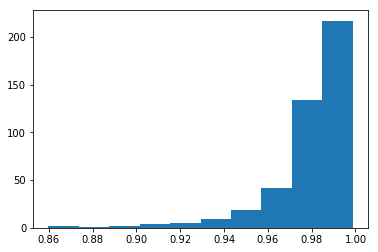

In [131]:
plt.hist(districts_pred_test_grouped['max_won_proba'])

(array([ 25.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 410.]),
 array([0.50002556, 0.550023  , 0.60002044, 0.65001789, 0.70001533,
        0.75001278, 0.80001022, 0.85000767, 0.90000511, 0.95000256,
        1.        ]),
 <a list of 10 Patch objects>)

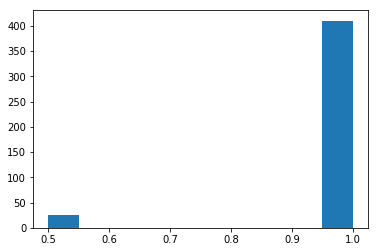

In [132]:
plt.hist(districts_pred_test_grouped['relative_won_proba'])

In [127]:
#join candidate data with max predictions probabilities 
districts_pred_test_2=districts_pred_test.join(districts_pred_test_grouped.set_index(['state', 'district', 'max_won_proba'])['won_pred'],on=['state', 'district', 'y_pred']).fillna(0)
districts_pred_test_2.head()

,state,district,party,y_pred,won_pred
9130,California,District 28,0.0,0.966420,1.0
9131,Utah,District 2,0.0,0.000030,0.0
9132,California,District 31,0.0,0.915699,1.0
9133,Texas,District 35,0.0,0.982947,1.0
9134,Texas,District 36,1.0,0.988179,1.0


In [130]:
#districts with more than one winner or no winners 
house_df_grouped=districts_pred_test_2.groupby(['state', 'district'])['won_pred'].sum().reset_index(drop=False)
display(len(house_df_grouped[house_df_grouped['won_pred']!=1]))
house_df_grouped[house_df_grouped['won_pred']!=1]

0

,state,district,won_pred


In [135]:
#districts_pred_test_grouped=districts_pred_test_grouped.set_index('index')
#y_pred_test_2=y_pred_test_df.join(districts_pred_test_grouped.set_index('index')).fillna(0)['won_pred']
#y_pred_test_2=pd.DataFrame(np.ones(len(districts_pred_test_grouped)), index=districts_pred_test_grouped['index'], columns=['y_pred'])

sum(districts_pred_test_2['won_pred']==y_test)/len(districts_pred_test_2)


0.9952380952380953